In [12]:
import os
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np

# Import relevant gpet packages
from gpet import utils, dataset, predict, edgetrace

%matplotlib inline

In [13]:
reload(predict)
reload(utils)

<module 'gpet.utils' from '/Users/uzaykaradag/Developer/ELM-GPR-Tracer/gpet/utils.py'>

In [14]:
# Set up directories
scan_dir = '/Users/uzaykaradag/Developer/ELM-GPR-Tracer/data/scans'
pred_mask_dir = '/Users/uzaykaradag/Developer/ELM-GPR-Tracer/data/pred'
gt_mask_dir = '/Users/uzaykaradag/Developer/ELM-GPR-Tracer/data/masks'

# Get the list of scan and mask filenames
scan_files = set(os.listdir(scan_dir))
pred_mask_files = set(os.listdir(pred_mask_dir))
gt_mask_files = set(os.listdir(gt_mask_dir))

# Get only the matching files across all three directories
matching_files = list(scan_files.intersection(pred_mask_files, gt_mask_files))

# Ensure we have matching files
if not matching_files:
    raise ValueError("No matching files found across scans, predicted masks, and ground truth masks!")

print(f'Test subset of size {len(matching_files)}.')

# Load the dataset
scans, pred_elm_coords, gt_elm_coords = dataset.load_dataset(matching_files, scan_dir, pred_mask_dir, gt_mask_dir)

print(f"Number of scans loaded: {len(scans)}")
print(f"Shape of first scan: {scans[0].shape}")
print(f"Number of predicted ELM coordinates for first scan: {len(pred_elm_coords[0])}")
print(f"Number of ground truth ELM coordinates for first scan: {len(gt_elm_coords[0])}")

Test subset of size 1048.
Number of scans loaded: 1048
Shape of first scan: (251, 730)
Number of predicted ELM coordinates for first scan: 2322
Number of ground truth ELM coordinates for first scan: 2278


In [15]:
# Test the function using a singular scan
test_idx = 500
test_scan = scans[test_idx]
segnet_elm = pred_elm_coords[test_idx]
gt_elm = gt_elm_coords[test_idx]

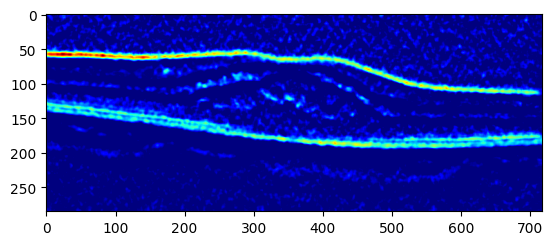

In [16]:
# Create a kernel for edge detection
kernel = utils.kernel_builder(size=(21, 5), unit=False, normalize=True)
# Compute the gradient image
test_edge_map = utils.compute_grad_image(test_scan, kernel)

plt.imshow(test_edge_map, cmap='jet')

In [17]:
reload(predict)

p30 = predict.trace_elm(test_edge_map, segnet_elm, num_runs=30)

TypeError: calculate_dice() missing 1 required positional argument: 'image_shape'

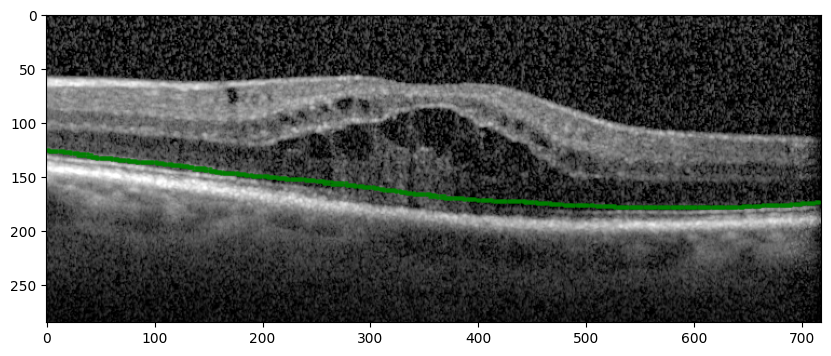

In [18]:
utils.plot_elm(test_scan, segnet_elm, compare=True, true_elm_coords=gt_elm)

In [ ]:
utils.plot_elm(test_scan, p30, compare=True, true_elm_coords=gt_elm)

In [ ]:
p100 = predict.trace_elm(test_edge_map, segnet_elm, num_runs=100)

In [ ]:
utils.plot_elm(test_scan, p100, compare=True, true_elm_coords=gt_elm)

# Experiment: Run and compare runtimes and DICE scores for different num_runs of trace_elm 

In [11]:
import time

nruns = [1, 3, 5, 10, 20, 50]

p = dict()
for num_run in nruns:
    start = time.time()
    p[num_run] = predict.trace_elm(test_edge_map, segnet_elm, num_runs=num_run)
    end = time.time()
    print(f'Elapsed time for {num_run}: {end - start}')

Elapsed time for 1: 0.6283431053161621
Elapsed time for 3: 2.089010000228882
Elapsed time for 5: 3.7637150287628174
Elapsed time for 10: 7.484356880187988
Elapsed time for 20: 13.819623947143555
Elapsed time for 50: 34.72963786125183


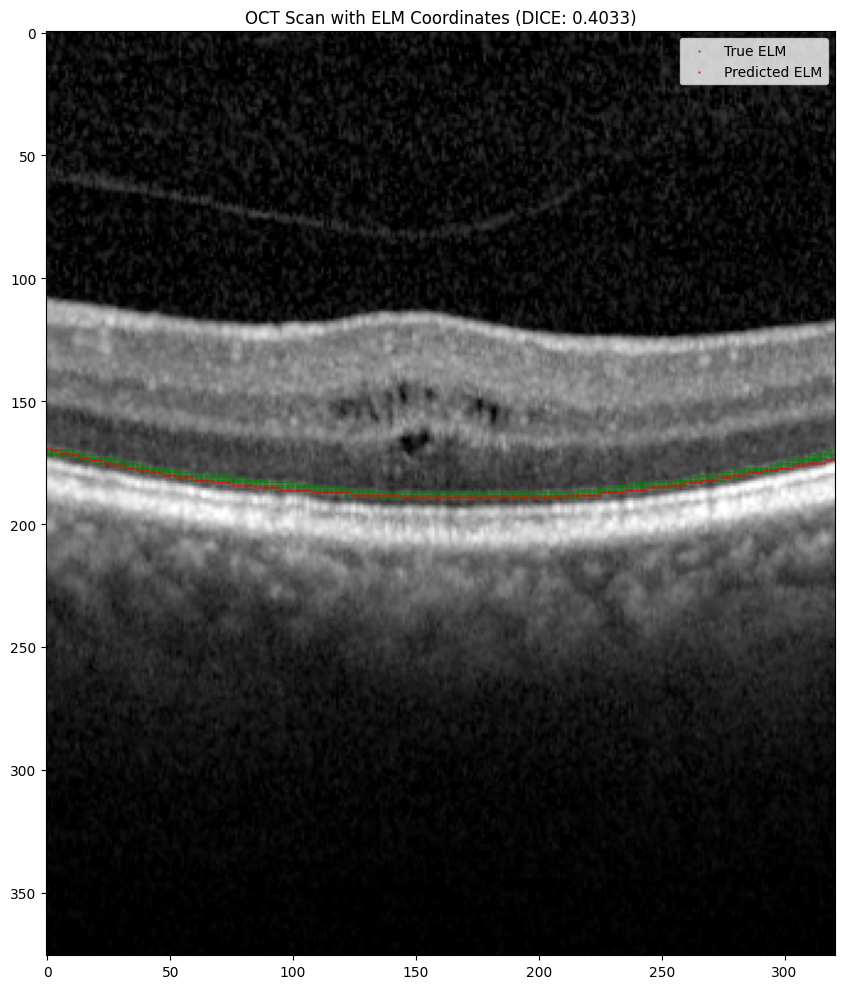

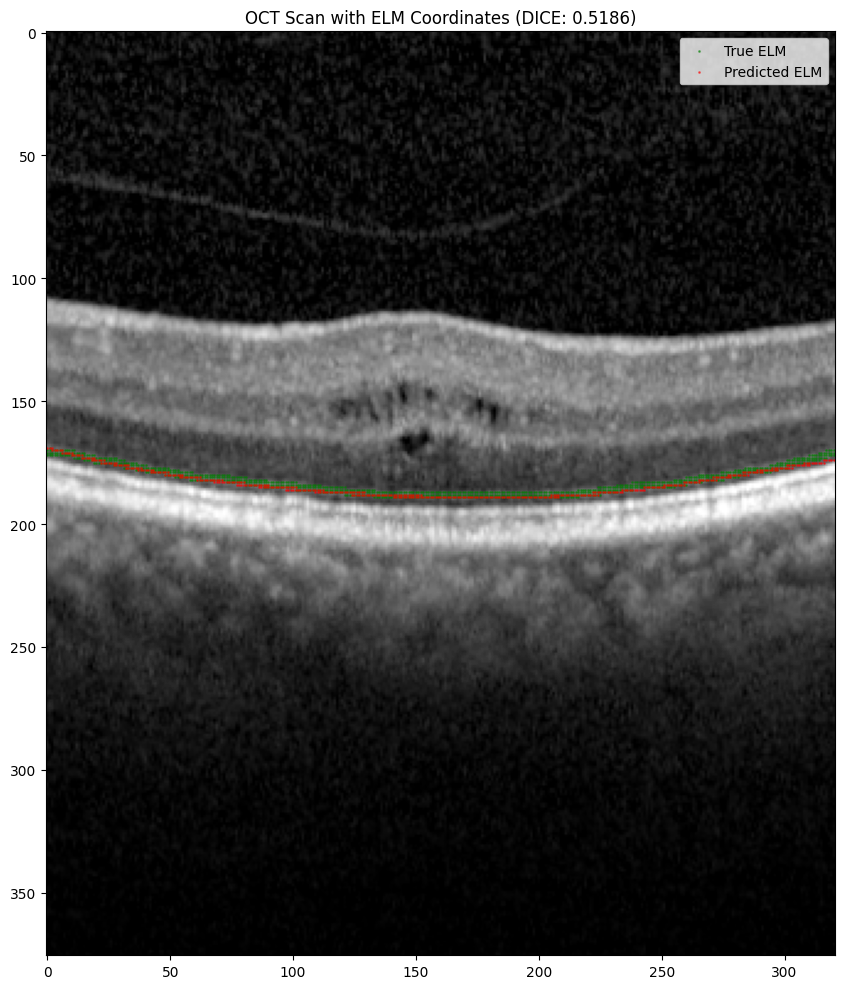

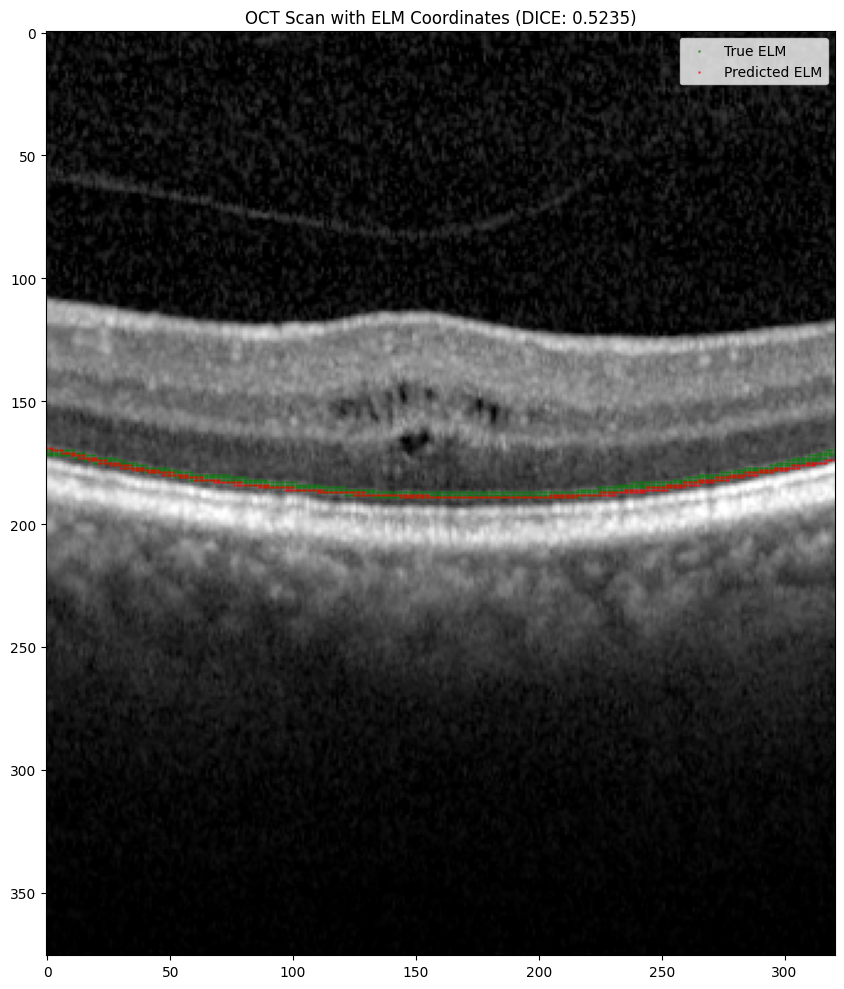

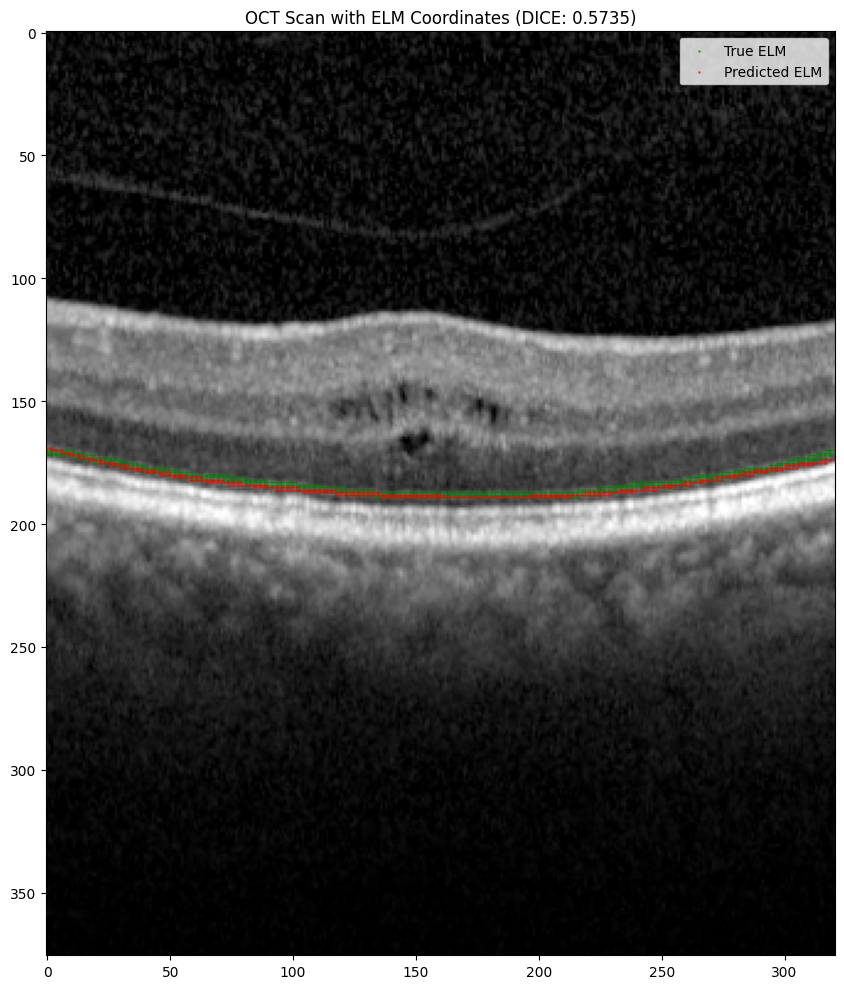

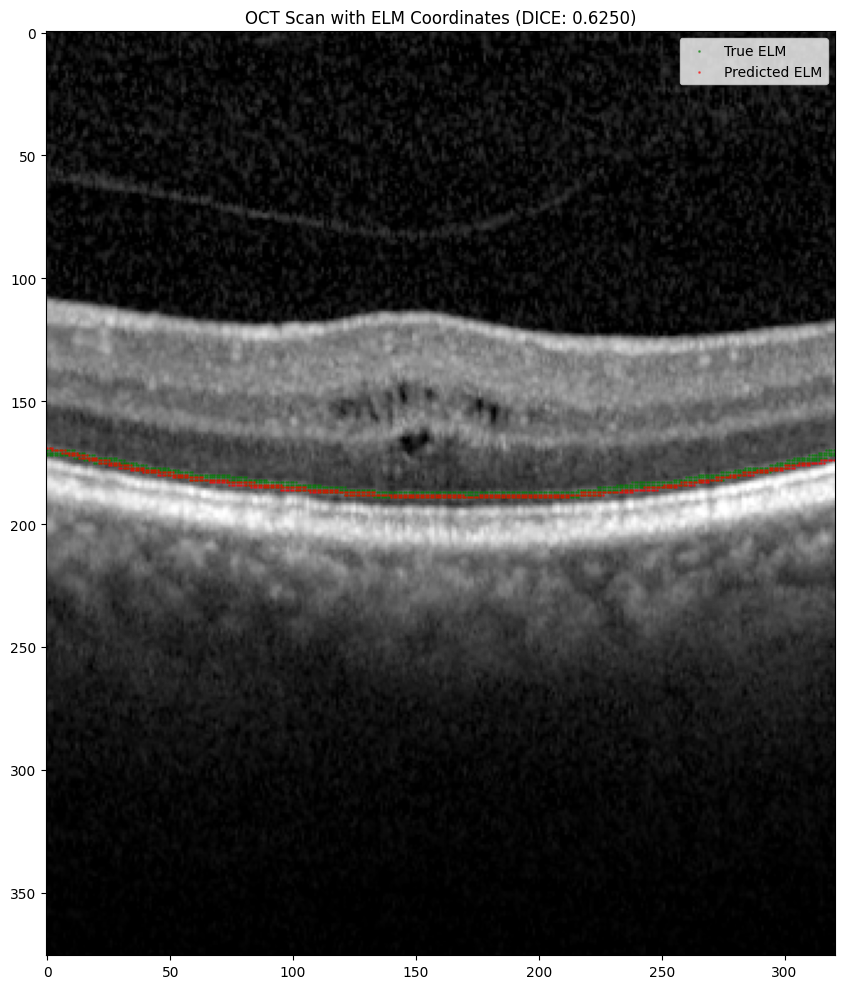

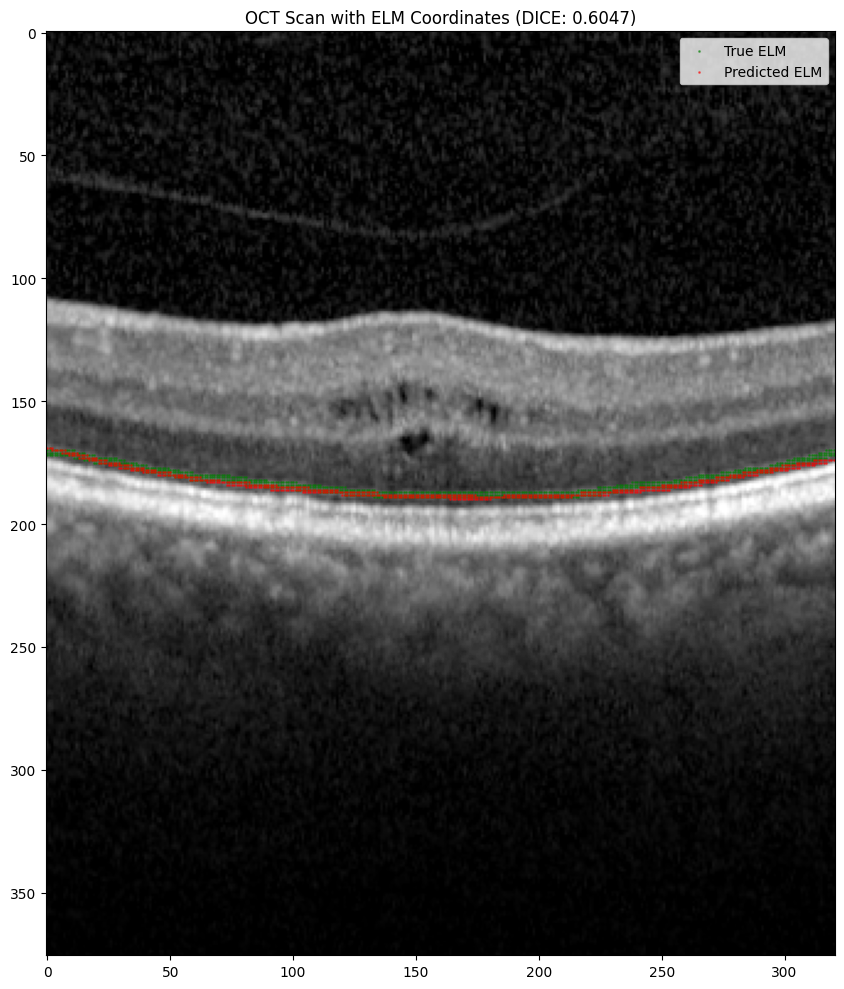

In [12]:
for i in nruns:
    utils.plot_elm(test_scan, p[i], compare=True, true_elm_coords=gt_elm)

In [13]:
sn_gp = np.vstack((segnet_elm, p[1]))
sn_gp = np.unique(sn_gp, axis=0)

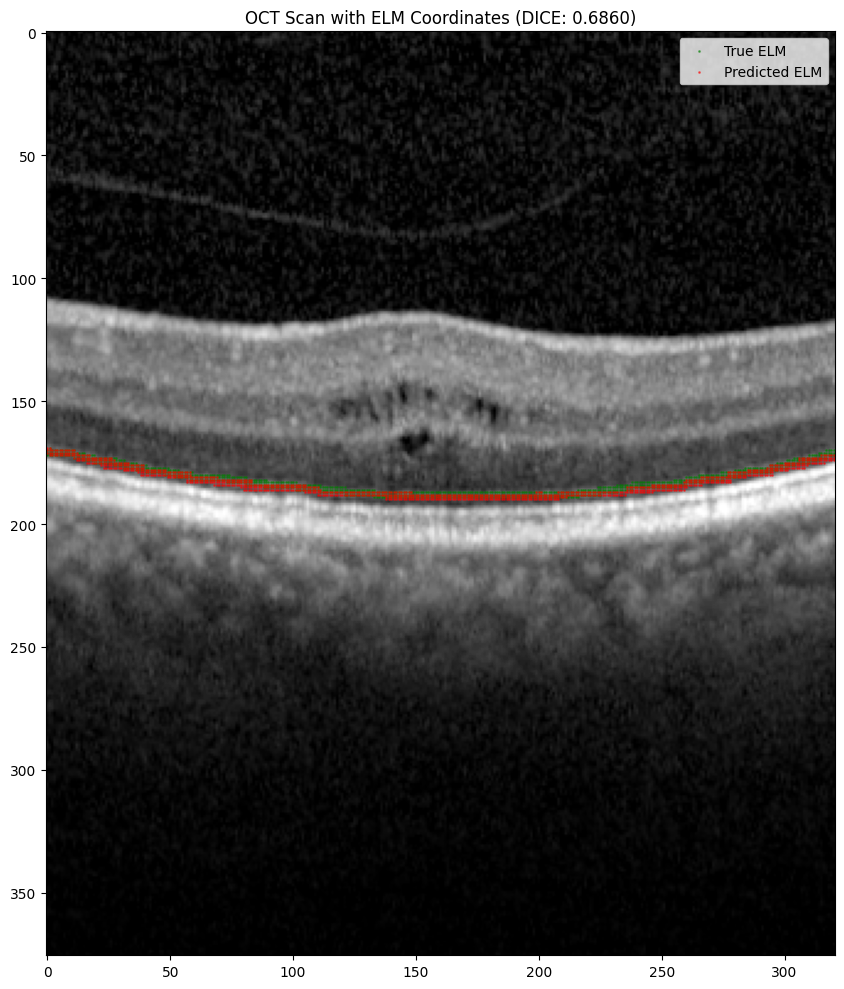

In [14]:
utils.plot_elm(test_scan, sn_gp, compare=True, true_elm_coords=gt_elm)

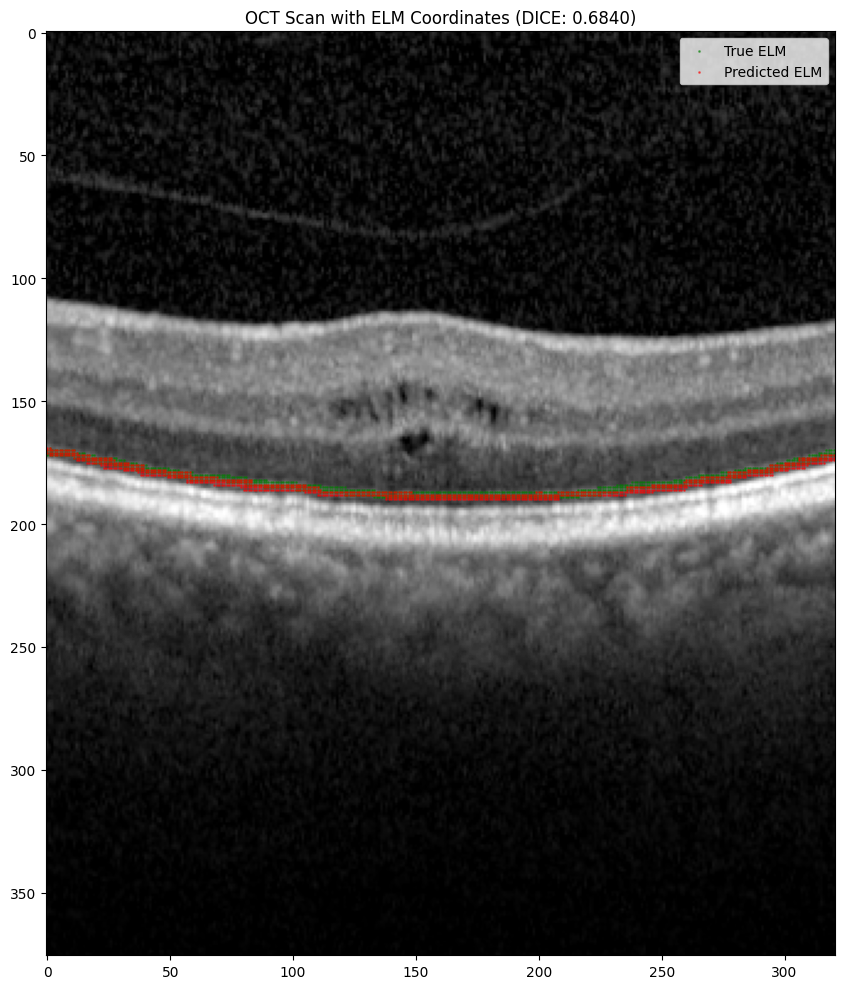

In [15]:
utils.plot_elm(test_scan, segnet_elm, compare=True, true_elm_coords=gt_elm)

In [19]:
dsn_list = []
for i, scan in enumerate(scans):
    dsn = utils.calculate_dice(pred_elm_coords[i], gt_elm_coords[i], scan.shape)
    dsn_list.append(dsn)
    print(dsn)

0.8304347826090642
0.7350835322200973
0.7309054122414494
0.7807971014497718
0.7475409836071092
0.781425891183014
0.7105637138803634
0.7529914529925086
0.6491092176620871
0.8377421370551182
0.6948561464703799
0.8423888639432313
0.8466424682402602
0.6952922917760201
0.746642793196628
0.7960288808673465
0.7940298507472934
0.6230954290311824
0.7798119742712528
0.7294552169910921
0.7462834489606229
0.7378076062645686
0.6032634032652529
0.8510254676586635
0.7526165556624519
0.7947970396954591
0.7214185720964936
0.730030333671739
0.7607244995239258
0.8239266763153694
0.8261933904532309
0.7207134171069286
0.7754179846372552
0.8395273899036745
0.8374476013049025
0.7030091583091888
0.7158189454049658
0.7369294605820045
0.7667458432315118
0.7880627212959632
0.7009079118036293
0.7947725072613999
0.7257240204440982
0.6682903068696138
0.801184015787858
0.7430221366711115
0.7833001988082341
0.7201995012482783
0.7527881040903681
0.761837121212685
0.709907059522029
0.7592551043308071
0.7334831460686135

In [20]:
np.average(dsn_list)

0.7556328655174954

(array([0.3647503 , 0.        , 0.        , 0.        , 0.12158343,
        0.12158343, 0.12158343, 0.        , 0.12158343, 0.        ,
        0.3647503 , 0.48633373, 0.7295006 , 0.97266746, 0.48633373,
        0.7295006 , 1.21583433, 1.58058462, 1.58058462, 1.82375149,
        1.82375149, 2.55325208, 2.06691835, 2.91800238, 3.64750298,
        3.16116925, 4.25542014, 4.74175387, 7.78133968, 5.9575882 ,
        6.56550536, 7.41658939, 7.17342252, 5.71442133, 8.38925685,
        7.78133968, 6.68708879, 4.74175387, 4.49858701, 4.8633373 ,
        2.91800238, 2.79641895, 2.79641895, 2.31008522, 1.09425089,
        0.97266746, 0.60791716, 0.        , 0.        , 0.3647503 ]),
 array([0.50998607, 0.51783416, 0.52568226, 0.53353035, 0.54137845,
        0.54922655, 0.55707464, 0.56492274, 0.57277084, 0.58061893,
        0.58846703, 0.59631512, 0.60416322, 0.61201132, 0.61985941,
        0.62770751, 0.6355556 , 0.6434037 , 0.6512518 , 0.65909989,
        0.66694799, 0.67479609, 0.68264418, 0.

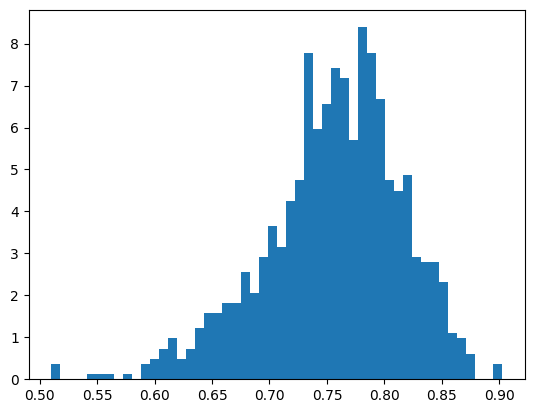

In [21]:
plt.hist(dsn_list, bins=50, density=True)

In [24]:
import time

In [25]:
chain_preds = []
dc = []

# Create a kernel for edge detection
kernel = utils.kernel_builder(size=(21, 5), unit=False, normalize=True)
for i, scan in enumerate(scans):
    start = time.time()
    # Compute the gradient image for the respective scan
    grad_scan = utils.compute_grad_image(scan, kernel)
    pred = predict.trace_elm(grad_scan, pred_elm_coords[i], num_runs=5)
    chain_preds.append(pred)
    dice_score = utils.calculate_dice(pred, gt_elm_coords[i], scan.shape)
    dc.append(dice_score)
    print(dice_score)
    end = time.time()
    print(f'Elapsed time for scan #{i}: {end - start}')

0.7030789825978498
Elapsed time for scan #0: 3.9888968467712402
0.5380540841942066
Elapsed time for scan #1: 4.193295001983643


KeyboardInterrupt: 

In [26]:
def create_semi_continuous_elm(elm_coords):
    # Sort the coordinates based on the x-coordinate (column)
    sorted_coords = elm_coords[elm_coords[:, 1].argsort()]
    
    semi_continuous_elm = []
    prev_x = -1
    
    for coord in sorted_coords:
        y, x = coord
        
        # Check if the current x-coordinate is different from the previous one
        if x != prev_x:
            semi_continuous_elm.append([y, x])
            prev_x = x
    
    return np.array(semi_continuous_elm)

In [27]:
new_gt = create_semi_continuous_elm(gt_elm)

In [32]:
reload(utils)

<module 'gpet.utils' from '/Users/uzaykaradag/Developer/ELM-GPR-Tracer/gpet/utils.py'>

TypeError: calculate_dice() missing 1 required positional argument: 'image_shape'

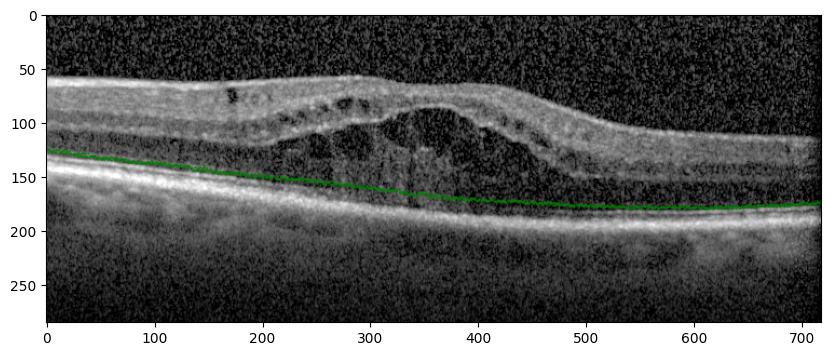

In [31]:
utils.plot_elm(test_scan, p30, compare=True, true_elm_coords=new_gt)

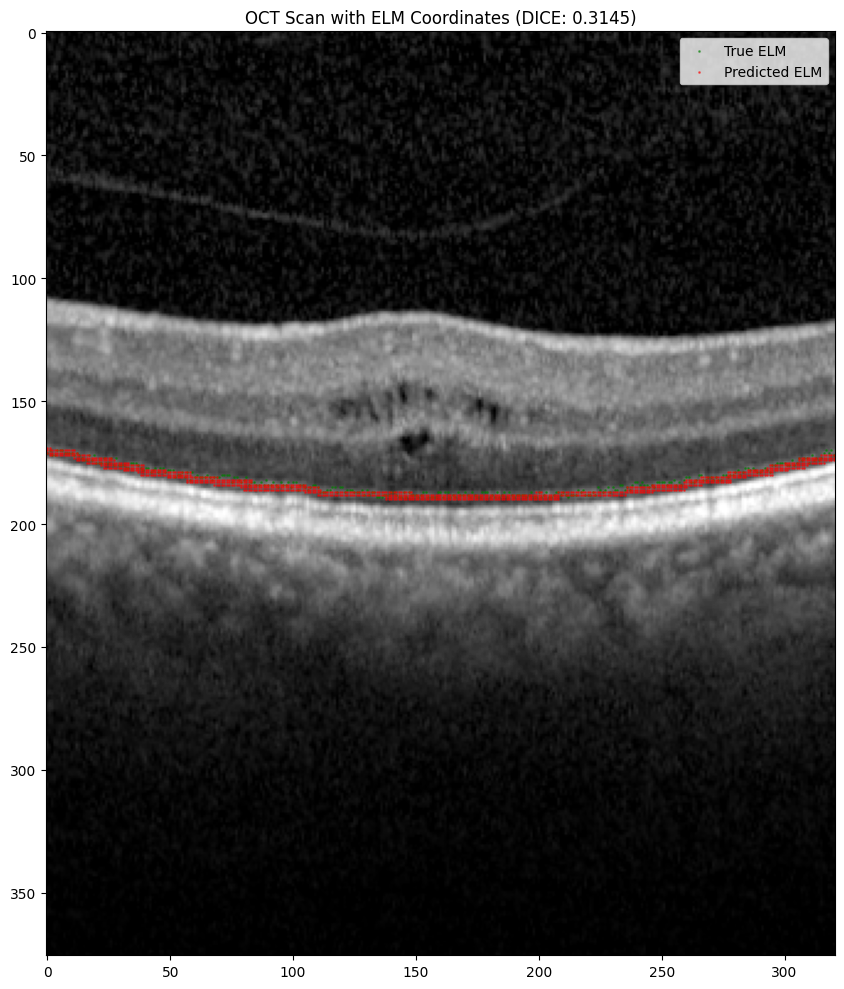

In [23]:
utils.plot_elm(test_scan, segnet_elm, compare=True, true_elm_coords=new_gt)

In [24]:
dsn_list_sc = []
for i, scan in enumerate(scans):
    dsn = utils.calculate_dice(pred_elm_coords[i], create_semi_continuous_elm(gt_elm_coords[i]), scan.shape)
    dsn_list_sc.append(dsn)
    print(dsn)

0.3717579250765724
0.3660220994518921
0.4095890410999344
0.358891752579385
0.3307086614217145
0.41281809613756576
0.3791208791251434
0.3131903833702847
0.4082798001469788
0.3310344827637469
0.30799220273354133
0.35971223022043375
0.3712067748809372
0.37426538818628435
0.3407742300103397
0.3515981735209163
0.390783961701404
0.3775510204127001
0.3889610389630228
0.3566433566478557
0.31149301826240067
0.3460207612502006
0.3487261146522742
0.3851174934745916
0.371487320086556
0.39333333333535553
0.31804733728315054
0.34742404227643714
0.38686836176573264
0.4278975741259168
0.3655334904094058
0.37061469265556035
0.33161290323011866
0.3613793103492319
0.35855363111711164
0.31973684210973863
0.35302293259657386
0.38177585633727373
0.3822476735906783
0.38831615120485113
0.36328749600459453
0.33915574964090867
0.4185293164903838
0.28100263852717017
0.3517422748213289
0.3759942154781201
0.2744836775531347
0.2547770700689683
0.39410187667966423
0.31662459430466416
0.3683453237455515
0.37192035099

In [25]:
np.average(dsn_list_sc)

0.3554324837821918

In [26]:
reload(utils)

dsn_list_sc = []
for i, scan in enumerate(scans):
    dsn = utils.calculate_dice(pred_elm_coords[i], create_semi_continuous_elm(gt_elm_coords[i]), scan.shape)
    dsn_list_sc.append(dsn)
    print(dsn)

0.3717579250765724
0.3660220994518921
0.4095890410999344
0.358891752579385
0.3307086614217145
0.41281809613756576
0.3791208791251434
0.3131903833702847
0.4082798001469788
0.3310344827637469
0.30799220273354133
0.35971223022043375
0.3712067748809372
0.37426538818628435
0.3407742300103397
0.3515981735209163
0.390783961701404
0.3775510204127001
0.3889610389630228
0.3566433566478557
0.31149301826240067
0.3460207612502006
0.3487261146522742
0.3851174934745916
0.371487320086556
0.39333333333535553
0.31804733728315054
0.34742404227643714
0.38686836176573264
0.4278975741259168
0.3655334904094058
0.37061469265556035
0.33161290323011866
0.3613793103492319
0.35855363111711164
0.31973684210973863
0.35302293259657386
0.38177585633727373
0.3822476735906783
0.38831615120485113
0.36328749600459453
0.33915574964090867
0.4185293164903838
0.28100263852717017
0.3517422748213289
0.3759942154781201
0.2744836775531347
0.2547770700689683
0.39410187667966423
0.31662459430466416
0.3683453237455515
0.37192035099

In [27]:
np.average(dsn_list_sc)

0.3554324837821918

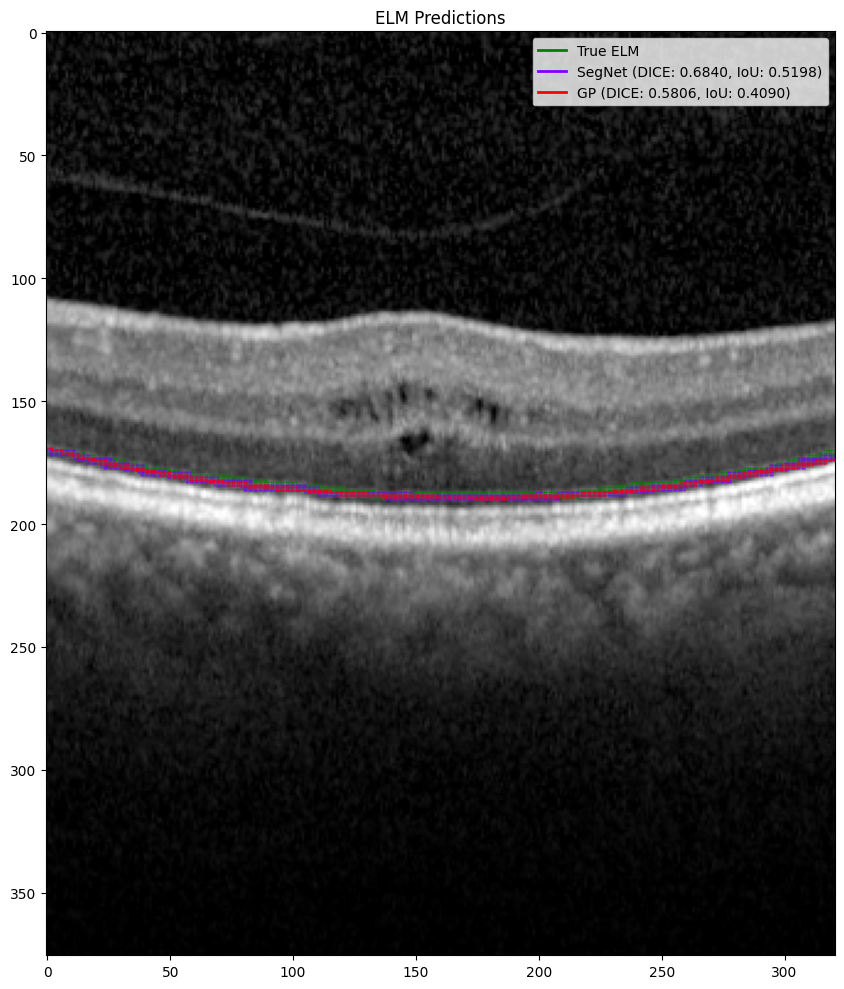

In [43]:
reload(utils)
fig = utils.plot_elm(test_scan, {'SegNet': segnet_elm, 'GP': p30}, true_elm_coords=gt_elm)